# making all imports

In [288]:
import pandas as pd
import numpy as np
import re
from io import StringIO
from matplotlib import pyplot
import seaborn as sns

%matplotlib inline
sns.set()

## Importing html

In [259]:
with open('brandss.html', 'r' ) as f:
    sio = StringIO(f.read())

### Creating dataframe from imported html

In [260]:
dfl = pd.read_html(sio)

In [261]:
df_orig = dfl[4]

# Cleaning data

In [262]:
df = dfl[4].drop('Unnamed: 0',1)
df = df.dropna()

In [263]:
df['Rank']=df['Rank'].str.replace('#','').astype('int')

In [264]:
df['brand_revenue_bd']=df['Brand Revenue'].str.replace('$','').str.replace('B','')

In [265]:
rx = re.compile('([$ B-])')

### Generating numeric variables

In [266]:
df['brand_revenue_bd']=df['Brand Revenue'].map(lambda x : rx.sub('', str(x))).astype('float')
df['brand_value_bd']=df['Brand Value'].map(lambda x : rx.sub('', str(x))).astype('float')
df['company_ad_bd']=df['Company Advertising'].map(lambda x : rx.sub('', str(x)))

In [267]:
def rep_M(x):
    if x != '':
        if x[-1] == 'M':
            return float(x[0:-1])/1000
        return float(x)
    else:
        return 0
df['company_ad_bd']=df['company_ad_bd'].map(rep_M)


In [269]:
df = df.drop(['Brand Revenue','Brand Value','Company Advertising'],1)

# Using plot from pandas library

In [409]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
# Usage in your pseudo-code snippet in the question:

cmap = get_cmap(5)
cmap

In [430]:
cm = pyplot.cm.get_cmap('YlGnBu_r')

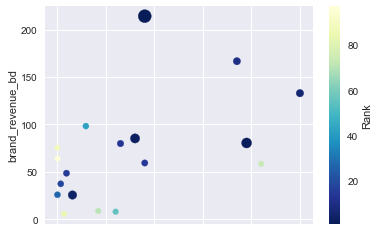

In [433]:
df[df['Industry'] == 'Technology'].plot(x='company_ad_bd', y='brand_revenue_bd', kind='scatter', s=df.brand_value_bd, c='Rank',cmap=cm)

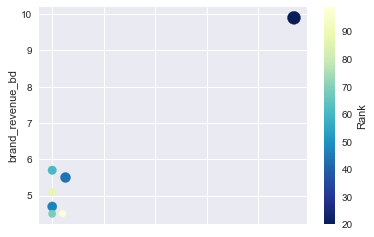

In [434]:
df[df['Industry'] == 'Luxury'].plot(x='company_ad_bd', y='brand_revenue_bd', kind='scatter', s=df.brand_value_bd,c='Rank',cmap=cm)

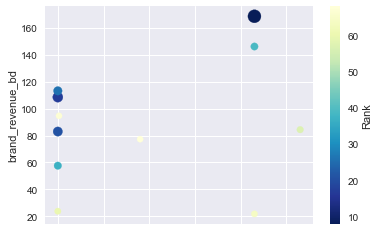

In [435]:
df[df['Industry'] == 'Automotive'].plot(x='company_ad_bd', y='brand_revenue_bd', kind='scatter', s=df.brand_value_bd,c='Rank',cmap=cm)

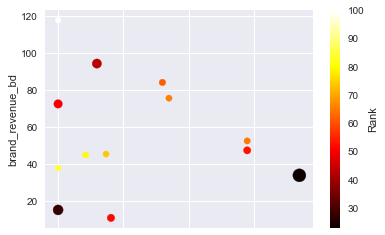

In [436]:
cm = pyplot.cm.get_cmap('hot')
df[df['Industry'] == 'Financial Services'].plot(x='company_ad_bd', y='brand_revenue_bd', kind='scatter', s=df.brand_value_bd,c='Rank',cmap=cm)

# Create better plots using Seaborn

In [348]:
size = df[df['Industry'] == 'Luxury'].brand_value_bd*10

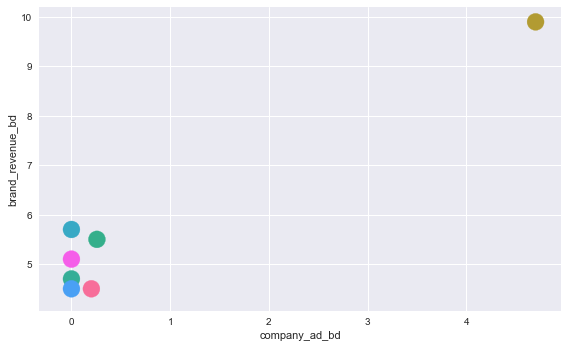

In [349]:
fg = sns.FacetGrid(data=df[df['Industry'] == 'Luxury'], hue='Rank', hue_order=list(df.Rank.unique()), aspect=1.61, size = 5)
fg.map(pyplot.scatter, 'company_ad_bd', 'brand_revenue_bd',s=size)

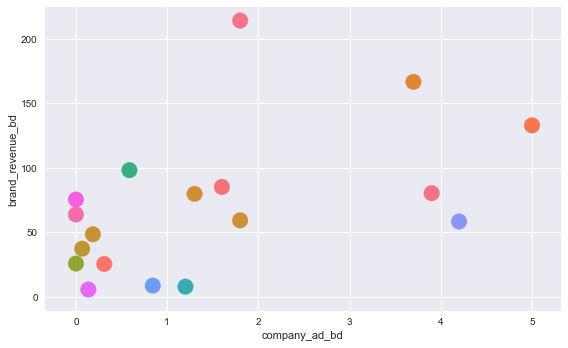

In [347]:
fg = sns.FacetGrid(data=df[df['Industry'] == 'Technology'], hue='Rank', hue_order=list(df.Rank.unique()), aspect=1.61, size = 5)
fg.map(pyplot.scatter, 'company_ad_bd', 'brand_revenue_bd',s=size)

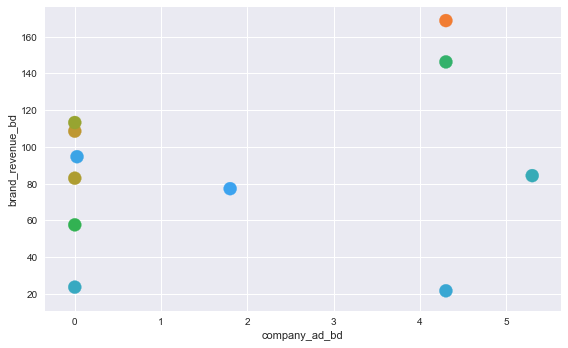

In [317]:
fg = sns.FacetGrid(data=df[df['Industry'] == 'Automotive'], hue='Rank', hue_order=list(df.Rank.unique()), aspect=1.61, size = 5 )
fg.map(pyplot.scatter, 'company_ad_bd', 'brand_revenue_bd',s=df.brand_value_bd)

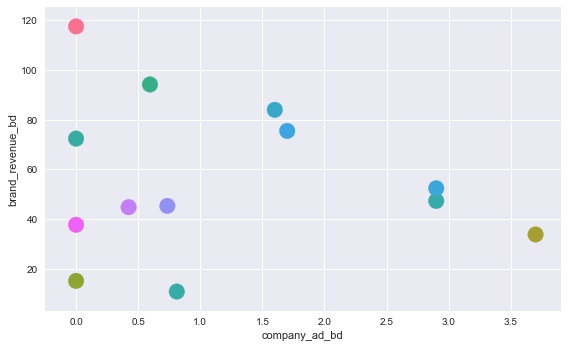

In [343]:
fg = sns.FacetGrid(data=df[df['Industry'] == 'Financial Services'], hue='Rank', hue_order=list(df.Rank.unique()), aspect=1.61, size = 5)
fg.map(pyplot.scatter, 'company_ad_bd', 'brand_revenue_bd',s=size)

In [316]:
df[df['Industry'] == 'Financial Services']

,Rank,Brand,1-Yr Value Change,Industry,brand_revenue_bd,brand_value_bd,company_ad_bd
24,23,American Express,1%,Financial Services,33.8,24.5,3.700
29,28,Visa,11%,Financial Services,15.1,21.4,0.000
46,43,Wells Fargo,4%,Financial Services,94.2,13.2,0.595
53,50,HSBC,-18%,Financial Services,72.4,11.4,0.000
56,52,Mastercard,8%,Financial Services,10.8,11.3,0.811
57,53,J.P. Morgan,9%,Financial Services,47.3,11.2,2.900
67,62,Citi,12%,Financial Services,84.0,9.2,1.600
70,65,Chase,7%,Financial Services,52.4,9.1,2.900
71,66,Bank of America,9%,Financial Services,75.5,9.1,1.700
80,74,Santander,3%,Financial Services,45.3,8.3,0.735
